In [1]:
import torch
import pyro

import pyro.distributions as dist
from pyro.infer.mcmc import MCMC, HMC, NUTS
from pyro.infer.mcmc.api import MCMC

from scipy.stats import uniform, norm

import matplotlib.pyplot as plt

pyro.set_rng_seed(42)

# Data Generation

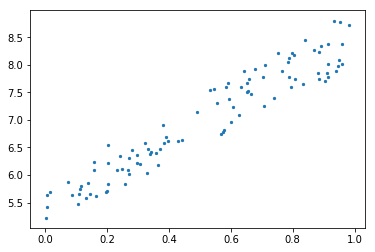

In [2]:
N = 100
X = torch.rand(N)
#a, b = 10, 5
#noise = torch.from_numpy(norm.rvs(loc=0, scale=0.05, size=N)).float()
#labels = a * X + b + noise

a, b, c, e = 3, 5, 1, 20
#labels = a * X + b + c * torch.rand(X.size()) 
labels = a * X  + b + c * torch.rand(X.size()) 

plt.scatter(X, labels, s=5)

# Model

In [3]:
def model(X):
    a = pyro.sample('a', dist.Normal(0.,10))
    b = pyro.sample('b', dist.Normal(0.,10))
#    e = pyro.sample('e', dist.Normal(0.,10))
    mu = a*X+b
#    mu = a*X + e*X*X + b
    sigma = pyro.sample('sigma', dist.Uniform(0,1))
    return pyro.sample('obs', dist.Normal(mu,sigma), obs=labels)

In [4]:
nuts_kernel = NUTS(model)
mcmc = MCMC(nuts_kernel, num_samples=200, warmup_steps=50)

In [5]:
mcmc.run(X)
mcmc.summary()

sample: 100%|██████████| 250/250 [00:05<00:00, 37.67it/s, step size=6.56e-02, acc. prob=0.900]




                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      3.11      0.07      3.11      2.96      3.21     24.87      1.08
         b      5.40      0.05      5.40      5.32      5.47     36.50      1.07
     sigma      0.28      0.02      0.28      0.25      0.31    159.43      1.00


